<a href="https://colab.research.google.com/github/damianmtz98/Datos_Masivos_MCD/blob/main/P1_Paralelizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 1: Paralelizacion**.

Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.

Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 

# **Lazy Variables**

Una lazy variable es una variable cuyo valor no se calcula o inicializa inmediatamente, sino que se pospone hasta que se solicite explícitamente. En lugar de realizar el cálculo de inmediato, la variable guarda una referencia o una función que se utilizará para calcular su valor cuando sea necesario.

La ventaja de usar lazy variables es que se evita el cálculo innecesario en situaciones donde la variable puede no ser utilizada en absoluto. Esto puede mejorar el rendimiento y la eficiencia de un programa.

El delay es un mecanismo específico que se utiliza para posponer la ejecución de una operación o función hasta que sea necesario. En lugar de ejecutar una función inmediatamente, se envuelve en una estructura de datos especial que la retiene hasta que se solicite su ejecución.

El uso de delay puede ser especialmente útil en problemas más grandes donde los cálculos son costosos y se pueden evitar evaluaciones innecesarias. Por ejemplo, en algoritmos de búsqueda o procesamiento de datos masivos, se pueden utilizar lazy variables y el "delay" para evitar cálculos costosos hasta que sea estrictamente necesario.



In [30]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time

In [35]:
from re import M
import concurrent.futures

def suma(x):
    sum = x + 2
    return sum

def resta(x):
    res = x - 4
    return res

def multiplicacion(x):
    mult = x * 5
    return mult

def square(x):
    sq = x ** 2
    return sq

comp = [1, 2, 3, 4]

# Creamos un executor para que se manejen los hilos
with concurrent.futures.ThreadPoolExecutor() as executor:
    sum = executor.map(suma, comp)
    res = executor.map(resta, sum)
    mult = executor.map(multiplicacion, res)
    sq = executor.map(square, mult)



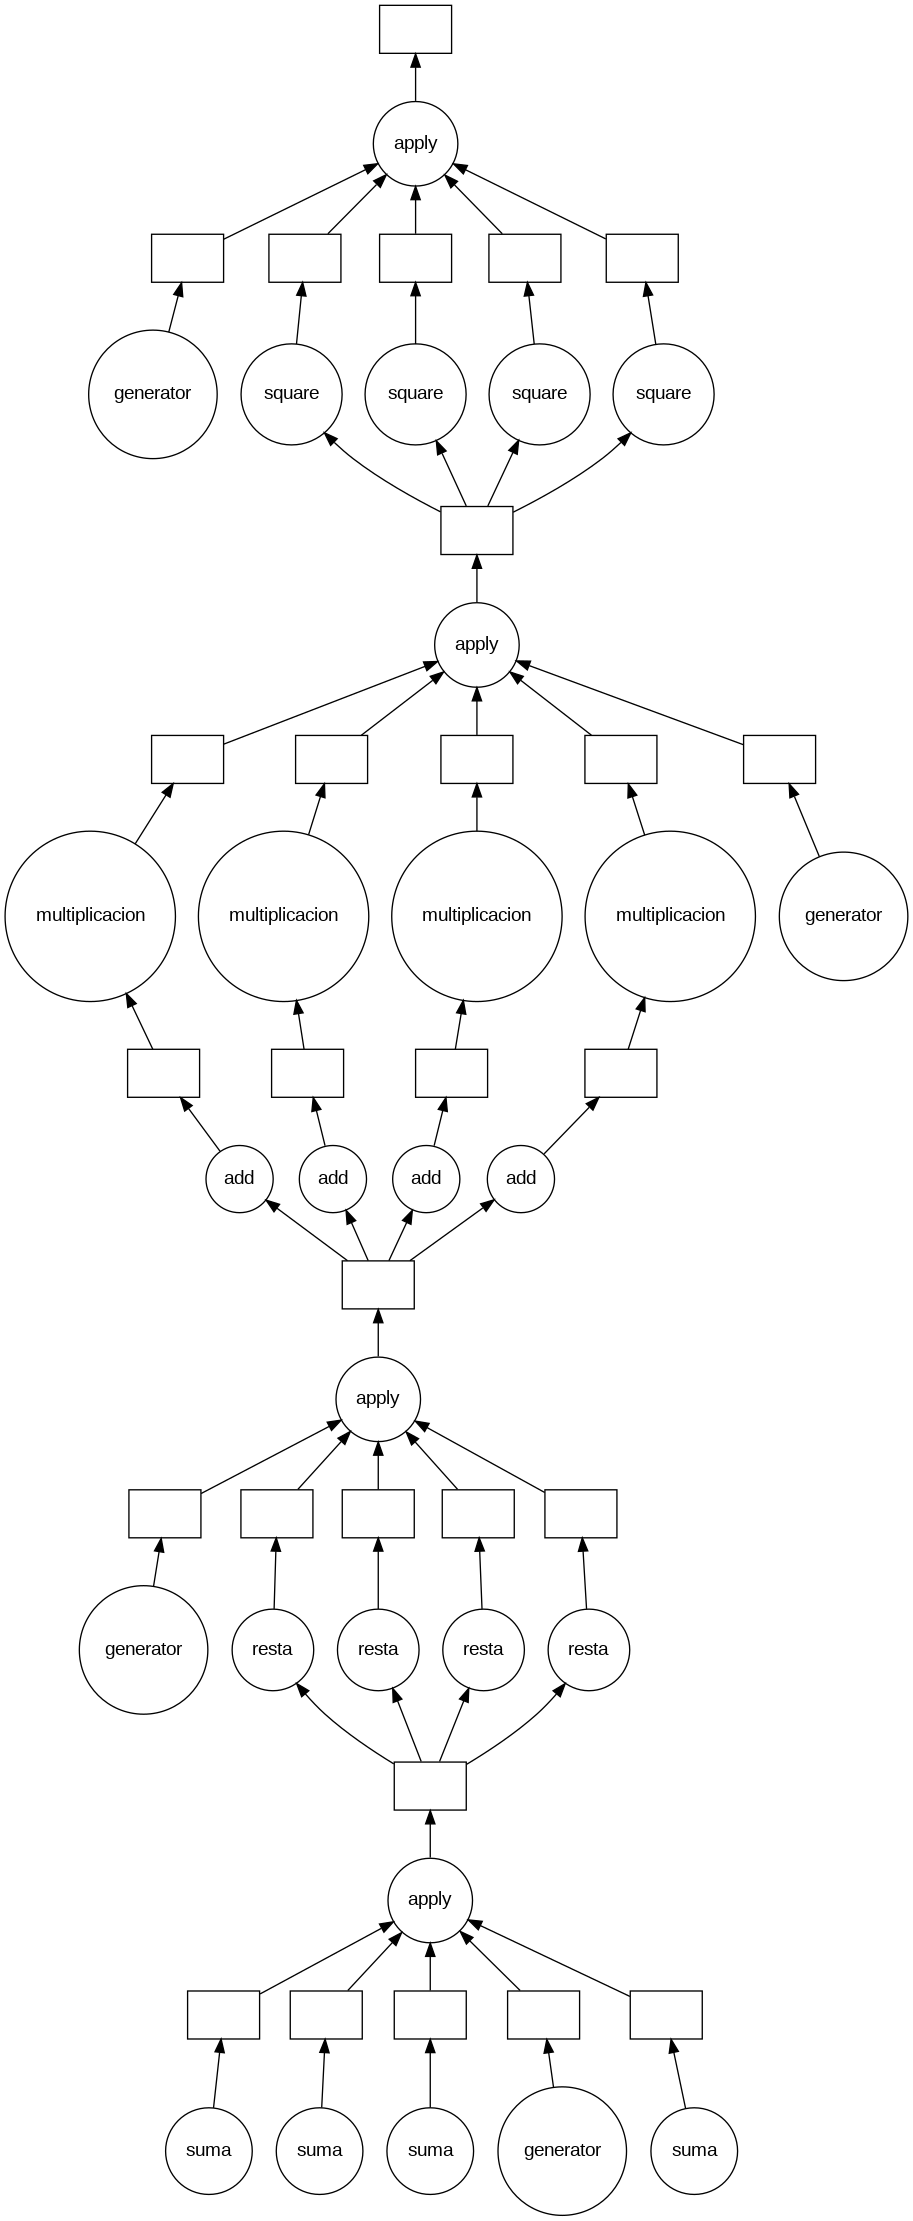

In [34]:

ec1 = [delayed(suma)(i) for i in comp]
total = delayed(sum)(ec1)

comp2 = [delayed(resta)(k, total) for k in comp]
tot2 = delayed(sum)(comp2)

comp3 = [delayed(multiplicacion)(k,tot2+k) for k in comp]
tot3 = delayed(sum)(comp3)

comp4 = [delayed(square)(k,tot3) for k in comp]
tot4 = delayed(sum)(comp4)

tot4.visualize()
     